<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Ruleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ruleta**

En el famoso juego de la ruleta, existen muchas opciones para apostar. Una de ellas consiste en apostarle al color rojo o al color negro. En el tablero de la ruleta existen 10 números rojos, 10 números negros y 2 números verdes (cero y doble cero). Si un jugador apuesta a un color y el color aparece, él o ella gana la cantidad apostada. Si otro color aparece, el jugador pierde la cantidad apostada. Si el color verde aparece, la rueda de la ruleta se vuelve a girar hasta que el color rojo o negro aparezca. Si este color es el color que se apostó, el jugador no gana ni pierde. De otra forma, se pierde la cantidad apostada.

Dos jugadores usan diferentes estrategias. Un jugador sim-plemente apuesta 1 peso al color rojo cada vez. El otro jugador empieza apostando un 1 peso al color rojo. Si él gana, él apuesta otro 1 peso. Sin embargo, si el pierde, él apuesta 2 pesos la próxima vez. Si él pierde otra vez, él apuesta 4 pesos. Este jugador puede continuar doblando la apuesta hasta un limite de 500.00 pesos. Si él pierde esta apuesta de 500 pesos, él empieza apostando nuevamente 1 peso.
Si cada jugador inicia el juego con 200 pesos, ¿cuál cree usted que es al mejor estrategia?


**Importación de librerias**

In [36]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

* numpy (np): Librería para operaciones matemáticas y manejo de arreglos.
* random (rnd): Para generar números aleatorios.
* matplotlib.pyplot (plt): Para graficar resultados.
* pandas (pd): Para estructurar y manejar datos en forma de DataFrame.
* scipy.stats: Para cálculos estadísticos, como el intervalo de confianza.

**Función color()**

In [37]:
def color():
    U1 = rnd.random()
    if U1 <= 1/11:
        C = 0  # Cae en verde
    elif 1/11 < U1 <= 6/11:
        C = 1  # Cae en rojo
    else:
        C = 2  # Cae en negro
    return U1, C

* color(): Genera un número aleatorio U1 y determina el color de la ruleta (verde, rojo o negro) según la distribución dada.

**Función generar_tabla(n)**

In [38]:
def generar_tabla(n):
    resultados = []
    for i in range(n):
        numero_aleatorio, color_obtenido = color()
        if color_obtenido == 0:
            color_nombre = "Verde"
        elif color_obtenido == 1:
            color_nombre = "Rojo"
        else:
            color_nombre = "Negro"
        resultados.append((i + 1, numero_aleatorio, color_nombre))

    df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Color'])
    print("\nTabla de Resultados:")
    print(df.to_string(index=False))
  # Crear un DataFrame de pandas para una mejor presentación
    df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Color'])
    print("\nTabla de Resultados:")
    print(df.to_string(index=False))  # Mostrar la tabla sin índices

# Generar la tabla
generar_tabla(10)


Tabla de Resultados:
 Corrida  Número Aleatorio Color
       1          0.342593  Rojo
       2          0.749790 Negro
       3          0.157023  Rojo
       4          0.109824  Rojo
       5          0.400067  Rojo
       6          0.575991 Negro
       7          0.610964 Negro
       8          0.528759  Rojo
       9          0.370636  Rojo
      10          0.339362  Rojo

Tabla de Resultados:
 Corrida  Número Aleatorio Color
       1          0.342593  Rojo
       2          0.749790 Negro
       3          0.157023  Rojo
       4          0.109824  Rojo
       5          0.400067  Rojo
       6          0.575991 Negro
       7          0.610964 Negro
       8          0.528759  Rojo
       9          0.370636  Rojo
      10          0.339362  Rojo


* generar_tabla(n): Genera una tabla de** n **corridas de la ruleta, mostrando el número aleatorio generado y el color correspondiente. Utiliza la función **color()** para obtener los resultados.

**Simulación del juego para el jugador 1**

In [39]:
resultados = []

for i in range(10):
    numero_aleatorio, color_obtenido = color()

    if color_obtenido == 0:
        color_nombre = "Verde"
        ganar = 0
        perder = 0
    elif color_obtenido == 1:
        color_nombre = "Rojo"
        ganar = 1
        perder = 0
    else:
        color_nombre = "Negro"
        ganar = 0
        perder = 1

    resultados.append((i + 1, numero_aleatorio, color_nombre, ganar, perder))

df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Color', 'Gana', 'Pierde'])


* Simulación del jugador 1: Simula 10 tiradas del jugador 1, registrando el número aleatorio generado, el color obtenido, y si ganó o perdió la apuesta. Luego, crea un DataFrame **df** con estos resultados.

**Simulación de múltiples juegos para el jugador 1 y cálculo de ganancias promedio e intervalos de confianza**

In [40]:
num_simulaciones = 100
ganancias = []

for i in range(num_simulaciones):
    resultados = []

    for i in range(50):  # Simulación de 50 tiradas por simulación
        numero_aleatorio, color_obtenido = color()

        if color_obtenido == 0:
            color_nombre = "Verde"
            ganar = 0
            perder = 0
        elif color_obtenido == 1:
            color_nombre = "Rojo"
            ganar = 1
            perder = 0
        else:
            color_nombre = "Negro"
            ganar = 0
            perder = 1

        resultados.append((numero_aleatorio, color_nombre, ganar, perder))

    df = pd.DataFrame(resultados, columns=['Número Aleatorio', 'Color', 'Gana', 'Pierde'])
    df['Corrida'] = np.arange(1, len(df) + 1)

    ganancia = 200 + sum(df['Gana']) - sum(df['Pierde'])
    ganancias.append(ganancia)

ganancia_promedio_jugador1 = np.mean(ganancias)
intervalo_confianza_jugador1 = stats.t.interval(0.95, len(ganancias)-1, loc=ganancia_promedio_jugador1, scale=stats.sem(ganancias))


* Simulación del jugador 1 a través de múltiples juegos: Realiza 100 simulaciones donde cada simulación consiste en 50 tiradas. Calcula las ganancias totales para cada simulación, y luego calcula la ganancia promedio y el intervalo de confianza al 95% utilizando **scipy.stats**.

**Graficar los resultados para el jugador 1**

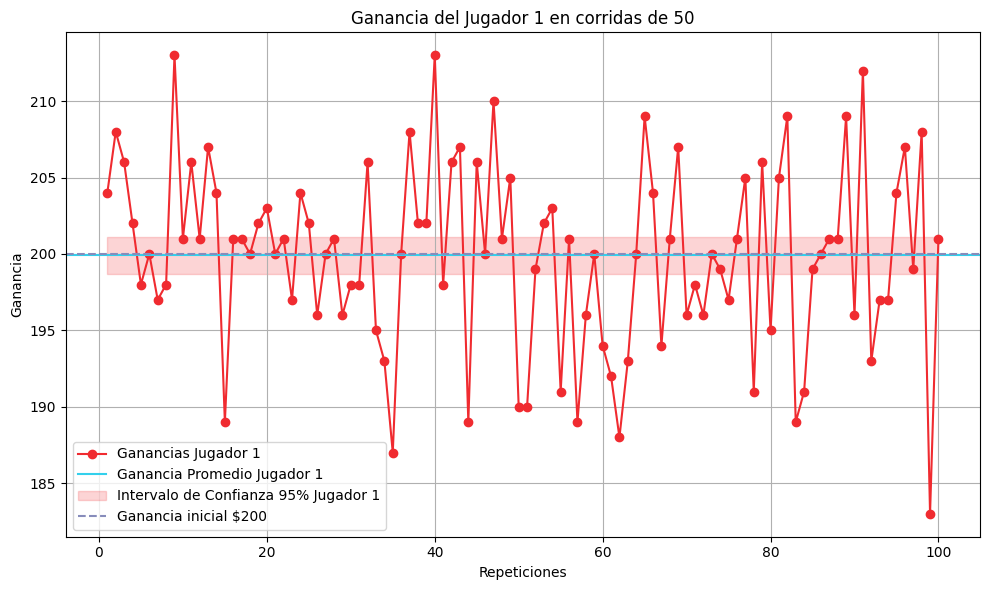

In [41]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulaciones + 1), ganancias, color='#F02B30', marker='o', label='Ganancias Jugador 1')
plt.axhline(y=ganancia_promedio_jugador1, color='#33D0EC', linestyle='-', label='Ganancia Promedio Jugador 1')
plt.fill_between(range(1, num_simulaciones + 1), intervalo_confianza_jugador1[0], intervalo_confianza_jugador1[1], color='#F02B30', alpha=0.2, label='Intervalo de Confianza 95% Jugador 1')
plt.axhline(y=200, color='#878CBB', linestyle='--', label='Ganancia inicial $200')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Ganancia del Jugador 1 en corridas de 50')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Mostrar la ganancia promedio e intervalo de confianza para jugador 1**

In [42]:
# Mostrar la ganancia promedio e intervalo de confianza para jugador 1
print(f"\nGanancia Promedio Jugador 1: ${ganancia_promedio_jugador1:.2f}")
print(f"Intervalo de Confianza 95% Jugador 1: (${intervalo_confianza_jugador1[0]:.2f}, ${intervalo_confianza_jugador1[1]:.2f})")



Ganancia Promedio Jugador 1: $199.90
Intervalo de Confianza 95% Jugador 1: ($198.69, $201.11)


**Simulación del juego para el jugador 2**

In [43]:
resultados = []
apuesta_actual = 1
ganancia_total = 0

for i in range(10):  # Ajusta el rango según tus necesidades
    numero_aleatorio, color_obtenido = color()

    if color_obtenido == 2:  # Negro
        ganar = -apuesta_actual
        ganancia_total += ganar
        apuesta_actual *= 2  # Duplicar la apuesta
    else:  # Rojo o Verde
        ganar = apuesta_actual
        ganancia_total += ganar
        apuesta_actual = 1  # Reiniciar la apuesta a $1 después de ganar

        if apuesta_actual > 500:  # Límite máximo de apuesta
            apuesta_actual = 1  # Reiniciar la apuesta a $1 si se alcanza el límite

    resultados.append((i + 1, numero_aleatorio, resultado, ganar, apuesta_actual, ganancia_total))

df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Resultado', 'Gana', 'Apuesta Actual', 'Ganancia Total'])

# Mostrar el DataFrame para jugador 2
print("\nResultados para el segundo jugador:")
print(df.to_string(index=False))  # Mostrar la tabla sin índices
# Cálculo de la ganancia promedio e intervalos de confianza para jugador 1
ganancia_promedio_jugador1 = np.mean(ganancias)
intervalo_confianza_jugador1 = stats.t.interval(0.95, len(ganancias)-1, loc=ganancia_promedio_jugador1, scale=stats.sem(ganancias))




Resultados para el segundo jugador:
 Corrida  Número Aleatorio Resultado  Gana  Apuesta Actual  Ganancia Total
       1          0.369166    Pierde     1               1               1
       2          0.391920    Pierde     1               1               2
       3          0.583803    Pierde    -1               2               1
       4          0.940498    Pierde    -2               4              -1
       5          0.677138    Pierde    -4               8              -5
       6          0.172334    Pierde     8               1               3
       7          0.632328    Pierde    -1               2               2
       8          0.156309    Pierde     2               1               4
       9          0.251845    Pierde     1               1               5
      10          0.378554    Pierde     1               1               6


* Simulación del jugador 2: Simula 10 tiradas del jugador 2, registrando el número aleatorio generado, el resultado obtenido (ganancia o pérdida), la apuesta actual, y la ganancia total acumulada.

**Simulación de múltiples juegos para el jugador 2 y cálculo de ganancias promedio e intervalos de confianza**


In [44]:
simulaciones = 100
ganancias2 = []

for i in range(simulaciones):
    resultados = []
    apuesta_actual = 1
    ganancia_total = 0

    for j in range(50):  # Ajusta el rango según tus necesidades
        numero_aleatorio, color_obtenido = color()

        if color_obtenido == 2:  # Negro
            ganar = -apuesta_actual
            ganancia_total += ganar
            apuesta_actual *= 2  # Duplicar la apuesta
        else:  # Rojo o Verde
            ganar = apuesta_actual
            ganancia_total += ganar
            apuesta_actual = 1  # Reiniciar la apuesta a $1 después de ganar

            if apuesta_actual > 500:  # Límite máximo de apuesta
                apuesta_actual = 1  # Reiniciar la apuesta a $1 si se alcanza el límite

        resultados.append((j + 1, numero_aleatorio, resultado, ganar, apuesta_actual, ganancia_total))

    df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Resultado', 'Gana', 'Apuesta Actual', 'Ganancia Total'])

    retorno = 200 + sum(df['Ganancia Total'])
    ganancias2.append(retorno)

promedio_jugador2 = np.mean(ganancias2)
intervalo_confianza_jugador2 = stats.t.interval(0.95, len(ganancias2)-1, loc=promedio_jugador2, scale=stats.sem(ganancias2))


**Graficar los resultados para el jugador 2**

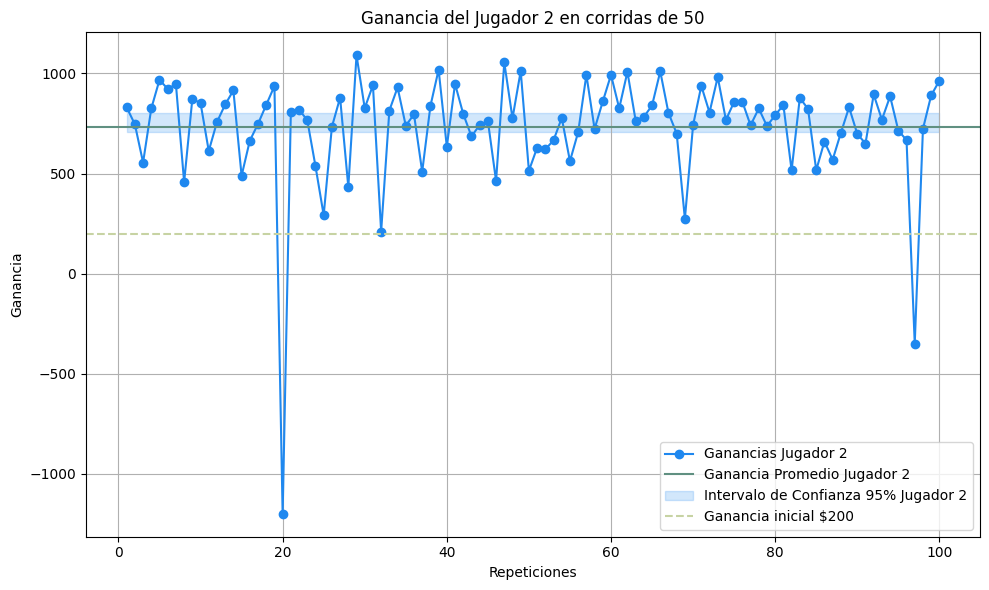


Ganancia Promedio Jugador 2: $733.93
Intervalo de Confianza 95% Jugador 2: ($678.11, $789.75)


In [45]:
# Graficar los resultados para el jugador 2
plt.figure(figsize=(10, 6))
plt.plot(range(1, simulaciones + 1), ganancias2, color='#1F88EF', marker='o', label='Ganancias Jugador 2')
plt.axhline(y=promedio_jugador2, color='#609081', linestyle='-', label='Ganancia Promedio Jugador 2')
plt.fill_between(range(1, simulaciones + 1), de[0], de[1], color='#1F88EF', alpha=0.2, label='Intervalo de Confianza 95% Jugador 2')
plt.axhline(y=200, color='#C7D3A3', linestyle='--', label='Ganancia inicial $200')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Ganancia del Jugador 2 en corridas de 50')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar la ganancia promedio e intervalo de confianza para jugador 2
print(f"\nGanancia Promedio Jugador 2: ${promedio_jugador2:.2f}")
print(f"Intervalo de Confianza 95% Jugador 2: (${intervalo_confianza_jugador2[0]:.2f}, ${intervalo_confianza_jugador2[1]:.2f})")


* Simulación del jugador 2 a través de múltiples juegos: Realiza 100 simulaciones donde cada simulación consiste en 50 tiradas. Calcula las ganancias totales para cada simulación, y luego calcula la ganancia promedio y el intervalo de confianza al 95% utilizando **scipy.stats**.

**Gráfica de comparación entre jugadores**

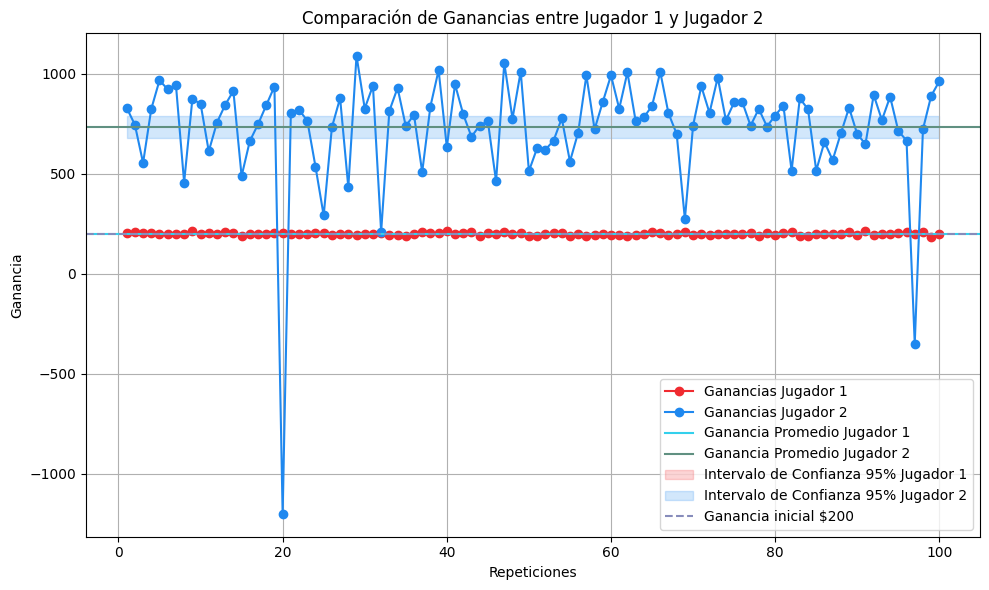

In [46]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulaciones + 1), ganancias, color='#F02B30', marker='o', label='Ganancias Jugador 1')
plt.plot(range(1, simulaciones + 1), ganancias2, color='#1F88EF', marker='o', label='Ganancias Jugador 2')
plt.axhline(y=ganancia_promedio_jugador1, color='#33D0EC', linestyle='-', label='Ganancia Promedio Jugador 1')
plt.axhline(y=promedio_jugador2, color='#609081', linestyle='-', label='Ganancia Promedio Jugador 2')
plt.fill_between(range(1, num_simulaciones + 1), intervalo_confianza_jugador1[0], intervalo_confianza_jugador1[1], color='#F02B30', alpha=0.2, label='Intervalo de Confianza 95% Jugador 1')
plt.fill_between(range(1, simulaciones + 1), intervalo_confianza_jugador2[0], intervalo_confianza_jugador2[1], color='#1F88EF', alpha=0.2, label='Intervalo de Confianza 95% Jugador 2')
plt.axhline(y=200, color='#878CBB', linestyle='--', label='Ganancia inicial $200')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Comparación de Ganancias entre Jugador 1 y Jugador 2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Mostrar la ganancia promedio e intervalo de confianza para cada jugador**

In [47]:

print(f"\nGanancia Promedio Jugador 1: ${ganancia_promedio_jugador1:.2f}")
print(f"Intervalo de Confianza 95% Jugador 1: (${intervalo_confianza_jugador1[0]:.2f}, ${intervalo_confianza_jugador1[1]:.2f})")
print(f"Ganancia Promedio Jugador 2: ${promedio_jugador2:.2f}")
print(f"Intervalo de Confianza 95% Jugador 2: (${intervalo_confianza_jugador2[0]:.2f}, ${intervalo_confianza_jugador2[1]:.2f})")



Ganancia Promedio Jugador 1: $199.90
Intervalo de Confianza 95% Jugador 1: ($198.69, $201.11)
Ganancia Promedio Jugador 2: $733.93
Intervalo de Confianza 95% Jugador 2: ($678.11, $789.75)


**Determinar mejor estrategia**

In [48]:

mejor_estrategia = "Jugador 1" if ganancia_promedio_jugador1 > promedio_jugador2 else "Jugador 2"
print(f"\nLa mejor estrategia es la del {mejor_estrategia}.")



La mejor estrategia es la del Jugador 2.


**CODIGO COMPLETO**


Tabla de Resultados:
 Corrida  Número Aleatorio Color
       1          0.168934  Rojo
       2          0.163638  Rojo
       3          0.319767  Rojo
       4          0.825824 Negro
       5          0.031619 Verde
       6          0.521599  Rojo
       7          0.579183 Negro
       8          0.977823 Negro
       9          0.414335  Rojo
      10          0.943418 Negro

Resultados para el primer jugador:
 Corrida  Número Aleatorio Color  Gana  Pierde
       1          0.850531 Negro     0       1
       2          0.817593 Negro     0       1
       3          0.608824 Negro     0       1
       4          0.841261 Negro     0       1
       5          0.560246 Negro     0       1
       6          0.760915 Negro     0       1
       7          0.874722 Negro     0       1
       8          0.588667 Negro     0       1
       9          0.431978  Rojo     1       0
      10          0.037497 Verde     0       0

Ganancia del jugador 1: $ 193


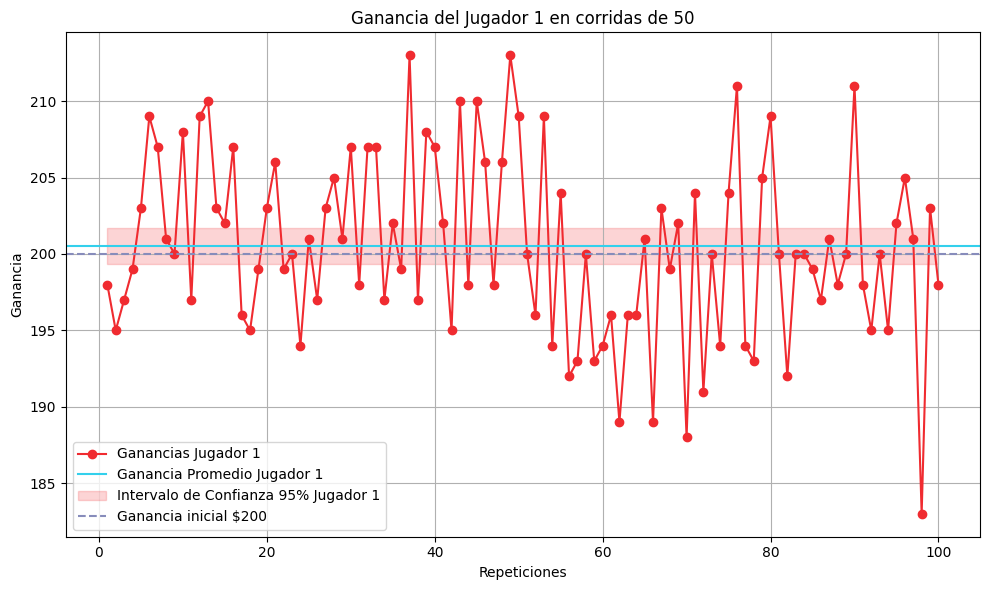


Ganancia Promedio Jugador 1: $200.50
Intervalo de Confianza 95% Jugador 1: ($199.32, $201.68)

Resultados para el segundo jugador:
 Corrida  Número Aleatorio Resultado  Gana  Apuesta Actual  Ganancia Total
       1          0.429654    Pierde     1               1               1
       2          0.861714    Pierde    -1               2               0
       3          0.670372    Pierde    -2               4              -2
       4          0.345802    Pierde     4               1               2
       5          0.619252    Pierde    -1               2               1
       6          0.272317    Pierde     2               1               3
       7          0.312183    Pierde     1               1               4
       8          0.189087    Pierde     1               1               5
       9          0.353198    Pierde     1               1               6
      10          0.121866    Pierde     1               1               7

Ganancia del jugador 2: $ 227


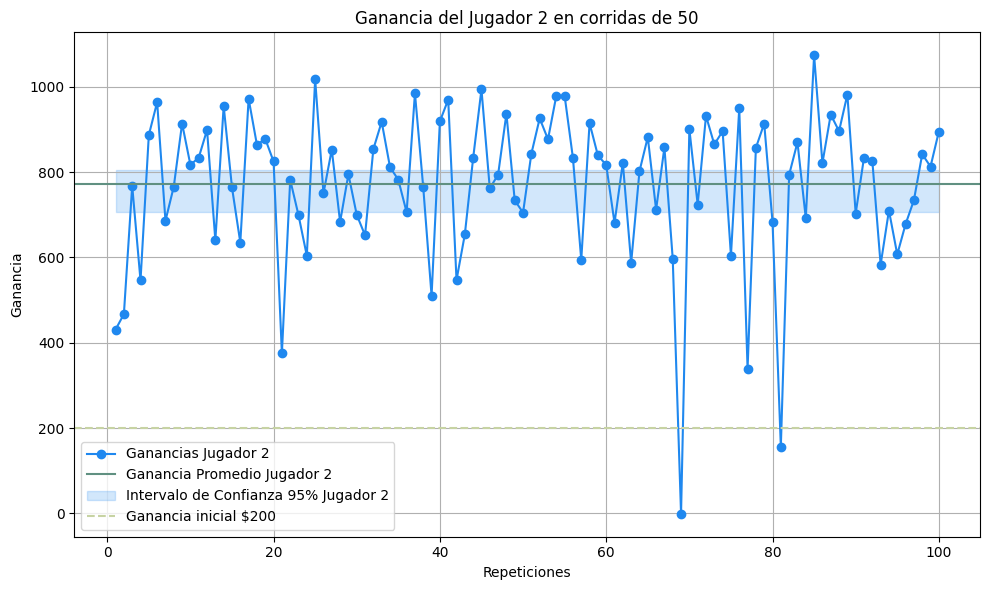


Ganancia Promedio Jugador 2: $772.56
Intervalo de Confianza 95% Jugador 2: ($737.67, $807.45)


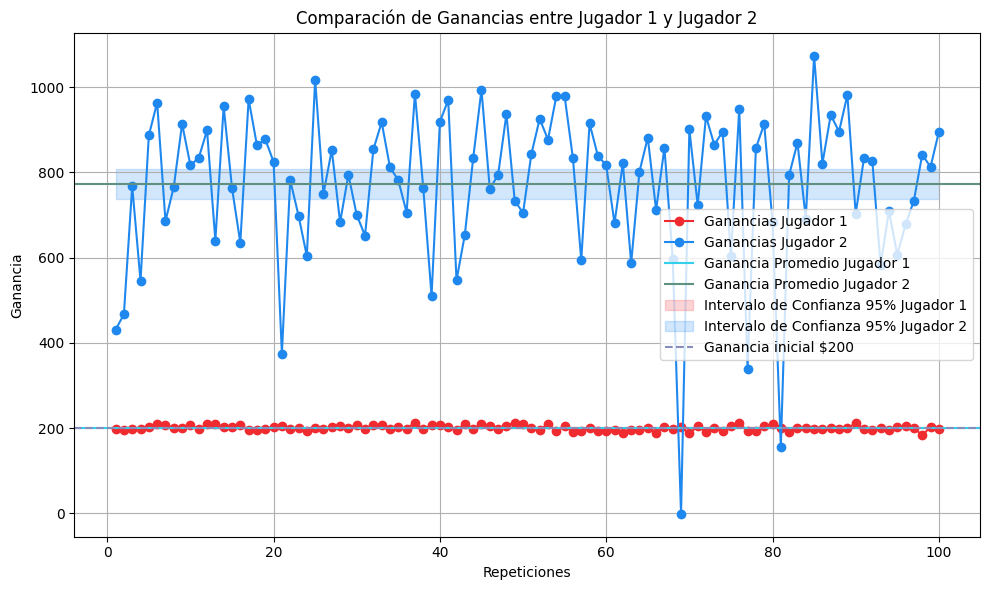


Ganancia Promedio Jugador 1: $200.50
Intervalo de Confianza 95% Jugador 1: ($199.32, $201.68)
Ganancia Promedio Jugador 2: $772.56
Intervalo de Confianza 95% Jugador 2: ($737.67, $807.45)

La mejor estrategia es la del Jugador 2.


In [49]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Definimos la función para la probabilidad
def color():
    U1 = rnd.random()
    if U1 <= 1/11:
        C = 0  # Cae en verde
    elif 1/11 < U1 <= 6/11:
        C = 1  # Cae en rojo
    else:
        C = 2  # Cae en negro
    return U1, C

def generar_tabla(n):
    resultados = []
    for i in range(n):
        numero_aleatorio, color_obtenido = color()
        if color_obtenido == 0:
            color_nombre = "Verde"
        elif color_obtenido == 1:
            color_nombre = "Rojo"
        else:
            color_nombre = "Negro"
        resultados.append((i + 1, numero_aleatorio, color_nombre))

    # Crear un DataFrame de pandas para una mejor presentación
    df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Color'])
    print("\nTabla de Resultados:")
    print(df.to_string(index=False))  # Mostrar la tabla sin índices

# Generar la tabla
generar_tabla(10)

# Simulamos el juego para el primer jugador
resultados = []

for i in range(10):
    numero_aleatorio, color_obtenido = color()

    if color_obtenido == 0:  # Evaluamos el color que cae en la ruleta y se le asigna un pago
        color_nombre = "Verde"
        ganar = 0
        perder = 0
    elif color_obtenido == 1:
        color_nombre = "Rojo"
        ganar = 1
        perder = 0
    else:
        color_nombre = "Negro"
        ganar = 0
        perder = 1

    resultados.append((i + 1, numero_aleatorio, color_nombre, ganar, perder))

# Crear el DataFrame
df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Color', 'Gana', 'Pierde'])

# Mostrar el DataFrame
print("\nResultados para el primer jugador:")
print(df.to_string(index=False))  # Mostrar la tabla sin índices

# Contamos la ganancia obtenida
ganancia1 = 200 + sum(df['Gana']) - sum(df['Pierde'])
print("\nGanancia del jugador 1: $", ganancia1)

# Número de simulaciones
num_simulaciones = 100
ganancias = []

# Simulamos el juego para el primer jugador
for i in range(num_simulaciones):
    resultados = []

    for i in range(50):  # Aquí se define el número de tiradas por simulación
        numero_aleatorio, color_obtenido = color()

        if color_obtenido == 0:  # Evaluamos el color que cae en la ruleta y se le asigna un pago
            color_nombre = "Verde"
            ganar = 0
            perder = 0
        elif color_obtenido == 1:
            color_nombre = "Rojo"
            ganar = 1
            perder = 0
        else:
            color_nombre = "Negro"
            ganar = 0
            perder = 1

        resultados.append((numero_aleatorio, color_nombre, ganar, perder))

    # Crear el DataFrame
    df = pd.DataFrame(resultados, columns=['Número Aleatorio', 'Color', 'Gana', 'Pierde'])
    df['Corrida'] = np.arange(1, len(df) + 1)

    # Contamos la ganancia obtenida
    ganancia = 200 + sum(df['Gana']) - sum(df['Pierde'])
    ganancias.append(ganancia)

# Cálculo de la ganancia promedio e intervalos de confianza para jugador 1
ganancia_promedio_jugador1 = np.mean(ganancias)
intervalo_confianza_jugador1 = stats.t.interval(0.95, len(ganancias)-1, loc=ganancia_promedio_jugador1, scale=stats.sem(ganancias))

# Graficar los resultados para el jugador 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulaciones + 1), ganancias, color='#F02B30', marker='o', label='Ganancias Jugador 1')
plt.axhline(y=ganancia_promedio_jugador1, color='#33D0EC', linestyle='-', label='Ganancia Promedio Jugador 1')
plt.fill_between(range(1, num_simulaciones + 1), intervalo_confianza_jugador1[0], intervalo_confianza_jugador1[1], color='#F02B30', alpha=0.2, label='Intervalo de Confianza 95% Jugador 1')
plt.axhline(y=200, color='#878CBB', linestyle='--', label='Ganancia inicial $200')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Ganancia del Jugador 1 en corridas de 50')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar la ganancia promedio e intervalo de confianza para jugador 1
print(f"\nGanancia Promedio Jugador 1: ${ganancia_promedio_jugador1:.2f}")
print(f"Intervalo de Confianza 95% Jugador 1: (${intervalo_confianza_jugador1[0]:.2f}, ${intervalo_confianza_jugador1[1]:.2f})")

# Simulamos el juego para el segundo jugador
resultados = []
apuesta_actual = 1
ganancia_total = 0

for i in range(10):  # Ajusta el rango según tus necesidades
    numero_aleatorio, color_obtenido = color()

    if color_obtenido == 2:  # Negro
        ganar = -apuesta_actual
        ganancia_total += ganar
        apuesta_actual *= 2  # Duplicar la apuesta
    else:  # Rojo o Verde
        ganar = apuesta_actual
        ganancia_total += ganar
        apuesta_actual = 1  # Reiniciar la apuesta a $1 después de ganar

        if apuesta_actual > 500:  # Límite máximo de apuesta
            apuesta_actual = 1  # Reiniciar la apuesta a $1 si se alcanza el límite

    resultados.append((i + 1, numero_aleatorio, resultado, ganar, apuesta_actual, ganancia_total))

# Crear el DataFrame para jugador 2
df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Resultado', 'Gana', 'Apuesta Actual', 'Ganancia Total'])

# Mostrar el DataFrame para jugador 2
print("\nResultados para el segundo jugador:")
print(df.to_string(index=False))  # Mostrar la tabla sin índices

# Contamos la ganancia obtenida para jugador 2
ganancia2 = 200 + sum(df['Ganancia Total'])
print("\nGanancia del jugador 2: $", ganancia2)

# Número de simulaciones para jugador 2
simulaciones = 100
ganancias2 = []

# Simulamos el juego para el segundo jugador
for i in range(simulaciones):
    resultados = []
    apuesta_actual = 1
    ganancia_total = 0

    for j in range(50):  # Ajusta el rango según tus necesidades
        numero_aleatorio, color_obtenido = color()

        if color_obtenido == 2:  # Negro
            ganar = -apuesta_actual
            ganancia_total += ganar
            apuesta_actual *= 2  # Duplicar la apuesta
        else:  # Rojo o Verde
            ganar = apuesta_actual
            ganancia_total += ganar
            apuesta_actual = 1  # Reiniciar la apuesta a $1 después de ganar

            if apuesta_actual > 500:  # Límite máximo de apuesta
                apuesta_actual = 1  # Reiniciar la apuesta a $1 si se alcanza el límite

        resultados.append((j + 1, numero_aleatorio, resultado, ganar, apuesta_actual, ganancia_total))

    # Crear el DataFrame
    df = pd.DataFrame(resultados, columns=['Corrida', 'Número Aleatorio', 'Resultado', 'Gana', 'Apuesta Actual', 'Ganancia Total'])

    retorno = 200 + sum(df['Ganancia Total'])
    ganancias2.append(retorno)

# Cálculo de la ganancia promedio e intervalos de confianza para jugador 2
promedio_jugador2 = np.mean(ganancias2)
intervalo_confianza_jugador2 = stats.t.interval(0.95, len(ganancias2)-1, loc=promedio_jugador2, scale=stats.sem(ganancias2))

# Graficar los resultados para el jugador 2
plt.figure(figsize=(10, 6))
plt.plot(range(1, simulaciones + 1), ganancias2, color='#1F88EF', marker='o', label='Ganancias Jugador 2')
plt.axhline(y=promedio_jugador2, color='#609081', linestyle='-', label='Ganancia Promedio Jugador 2')
plt.fill_between(range(1, simulaciones + 1), de[0], de[1], color='#1F88EF', alpha=0.2, label='Intervalo de Confianza 95% Jugador 2')
plt.axhline(y=200, color='#C7D3A3', linestyle='--', label='Ganancia inicial $200')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Ganancia del Jugador 2 en corridas de 50')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar la ganancia promedio e intervalo de confianza para jugador 2
print(f"\nGanancia Promedio Jugador 2: ${promedio_jugador2:.2f}")
print(f"Intervalo de Confianza 95% Jugador 2: (${intervalo_confianza_jugador2[0]:.2f}, ${intervalo_confianza_jugador2[1]:.2f})")

# Gráfica de comparación entre jugadores
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulaciones + 1), ganancias, color='#F02B30', marker='o', label='Ganancias Jugador 1')
plt.plot(range(1, simulaciones + 1), ganancias2, color='#1F88EF', marker='o', label='Ganancias Jugador 2')
plt.axhline(y=ganancia_promedio_jugador1, color='#33D0EC', linestyle='-', label='Ganancia Promedio Jugador 1')
plt.axhline(y=promedio_jugador2, color='#609081', linestyle='-', label='Ganancia Promedio Jugador 2')
plt.fill_between(range(1, num_simulaciones + 1), intervalo_confianza_jugador1[0], intervalo_confianza_jugador1[1], color='#F02B30', alpha=0.2, label='Intervalo de Confianza 95% Jugador 1')
plt.fill_between(range(1, simulaciones + 1), intervalo_confianza_jugador2[0], intervalo_confianza_jugador2[1], color='#1F88EF', alpha=0.2, label='Intervalo de Confianza 95% Jugador 2')
plt.axhline(y=200, color='#878CBB', linestyle='--', label='Ganancia inicial $200')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Comparación de Ganancias entre Jugador 1 y Jugador 2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar la ganancia promedio e intervalo de confianza para cada jugador
print(f"\nGanancia Promedio Jugador 1: ${ganancia_promedio_jugador1:.2f}")
print(f"Intervalo de Confianza 95% Jugador 1: (${intervalo_confianza_jugador1[0]:.2f}, ${intervalo_confianza_jugador1[1]:.2f})")
print(f"Ganancia Promedio Jugador 2: ${promedio_jugador2:.2f}")
print(f"Intervalo de Confianza 95% Jugador 2: (${intervalo_confianza_jugador2[0]:.2f}, ${intervalo_confianza_jugador2[1]:.2f})")

# Determinar mejor estrategia
mejor_estrategia = "Jugador 1" if ganancia_promedio_jugador1 > promedio_jugador2 else "Jugador 2"
print(f"\nLa mejor estrategia es la del {mejor_estrategia}.")
